# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports: importing numpy, pandas, matplotlib.pylot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat_2017.shape #checking data dimensions 

(51, 5)

In [6]:
act_2017.shape

(52, 7)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

-The SAT data shows us the participation level of students in each state, the average scores in each discipline (Reading and writing, and math) and the total of both scores


-The ACT data set shows us the participation level of students in each state, the average scores in 4 disciplines (Reading, English, Math and Science) and the composite, which is the average of all 4 disciplines. The composite is the average of the other 4 averages.

-For reference: The score range for the SAT is 400(lowest)−1600(hightest) for the total score. It's the sum of your scores on the Evidence-Based Reading and Writing (ERW) section and the Math section, which each have a score range of 200−800 

The ACT is scored from a range of 1-36 with 1 being the (lowest) and 36 being the (highest)

#### 4a. Does the data look complete? 

Answer: As seen by the dimensions of our array, our data is not exactly equal. For one we have 2 more colums in the ACT data set than we do in the SAT data set. We also have 52 in the ACT data rows as opposed to 51 in the SAT data set

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
sat_2017[["Evidence-Based Reading and Writing", "Math", "Total"]].min(axis=0)

Evidence-Based Reading and Writing    482
Math                                   52
Total                                 950
dtype: int64

In [8]:
sat_2017[["Evidence-Based Reading and Writing", "Math", "Total"]].max(axis=0)

Evidence-Based Reading and Writing     644
Math                                   651
Total                                 1295
dtype: int64

In [9]:
act_2017[["English", "Math", "Reading", "Science", "Composite"]].min(axis=0)

English      16.3
Math           18
Reading      18.1
Science       2.3
Composite    17.8
dtype: object

In [10]:
act_2017[["English", "Math", "Reading", "Science", "Composite"]].max(axis=0)

English      25.5
Math         25.3
Reading        26
Science      24.9
Composite    25.5
dtype: object

In [11]:
sat_2017['Math'].min() #This seems off being that the Math SAT range should be from 200-800

52

In [12]:
act_2017['Composite'].max()  #seems accurate. Range is from 1-36

'25.5'

In [13]:
act_2017['State'].head() #checking to see the state column to see why we have a discrepancy 
sat_2017['State'].head() 

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: State, dtype: object

Answer: SAT starts with the State while ACT starts with the National averages, hence why ACT has 52 rows

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

Other than the minimum math score being 52, everything else seems correct

In [14]:
sat_2017['State'].head() 

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: State, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [16]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  



Answer:They seem normal, however, I think 'Composite' under the ACT data set should be stored as a float. Also the participation rates in SAT and ACT data sets should be numerical values 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [17]:
def parti_cipation(part):
    
    new_part = part.replace('%','')
    return float(new_part)
    
    

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
act_2017['Participation'].apply(parti_cipation)

0      60.0
1     100.0
2      65.0
3      62.0
4     100.0
5      31.0
6     100.0
7      31.0
8      18.0
9      32.0
10     73.0
11     55.0
12     90.0
13     38.0
14     93.0
15     35.0
16     67.0
17     73.0
18    100.0
19    100.0
20      8.0
21     28.0
22     29.0
23     29.0
24    100.0
25    100.0
26    100.0
27    100.0
28     84.0
29    100.0
30     18.0
31     34.0
32     66.0
33     31.0
34    100.0
35     98.0
36     75.0
37    100.0
38     40.0
39     23.0
40     21.0
41    100.0
42     80.0
43    100.0
44     45.0
45    100.0
46     29.0
47     29.0
48     29.0
49     69.0
50    100.0
51    100.0
Name: Participation, dtype: float64

In [19]:
sat_2017['Participation'].apply(parti_cipation)

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [20]:
# def compo_site(comp):
    
#     new_comp = pd.to_numeric(comp, errors= 'coerce')
#     return new_comp
    

In [21]:
def compo_site(comp):
    
    new_comp = comp.replace('x','')
    return float(new_comp)

In [22]:
act_2017['Composite'] = act_2017['Composite'].apply(compo_site)

In [23]:
act_2017['Participation'] = act_2017['Participation'].apply(parti_cipation)

In [24]:
sat_2017['Participation'] = sat_2017['Participation'].apply(parti_cipation)

In [25]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [26]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [27]:
act_2017.head(3)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


- Display the data types again to confirm they are correct.

In [28]:
sat_2017.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [29]:
act_2017.head(3)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


In [30]:
sat_2017.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080


In [31]:
act_2017.rename(columns={'State': 'state', 'Participation': 'act_participation_17', 
                         'English': 'act_english_17', 'Math': 'act_math_17', 'Reading':'act_reading_17', 
                         'Science':'act_science_17', 'Composite': 'act_composite_17'}, inplace= True)

In [32]:
sat_2017.rename(columns={'State': 'state', 'Participation': 'sat_participation_17', 
                         'Evidence-Based Reading and Writing': 'ebrw_17', 'Math': 'sat_math_17', 
                         'Total': 'sat_total_17'}, inplace= True)

In [33]:
sat_2017.columns

Index(['state', 'sat_participation_17', 'ebrw_17', 'sat_math_17',
       'sat_total_17'],
      dtype='object')

In [34]:
act_2017.columns

Index(['state', 'act_participation_17', 'act_english_17', 'act_math_17',
       'act_reading_17', 'act_science_17', 'act_composite_17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

### come back to this

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state|*object*|ACT 2017| States that participated in taking the ACT | 
|****|*float*|SAT 2017|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [35]:
act_2017.head(2)

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2


In [36]:
act_2017.drop([0], axis = 0, inplace = True)

In [37]:
act_2017.shape #we've removed the national row

(51, 7)

In [38]:
act_2017.head(3)

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7


In [39]:
sat_2017.head(2)

,state,sat_participation_17,ebrw_17,sat_math_17,sat_total_17
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080


In [40]:
act_2017.set_index('state', inplace= True)

In [41]:
act_2017.head(2)

,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
state,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,65.0,18.7,19.8,20.4,19.9,19.8


In [42]:
sat_2017.set_index('state', inplace= True)

In [43]:
sat_2017.head(2)

,sat_participation_17,ebrw_17,sat_math_17,sat_total_17
state,,,,
Alabama,5.0,593,572,1165
Alaska,38.0,547,533,1080


In [44]:
sat_2017.shape

(51, 4)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [45]:
pd.merge(act_2017, sat_2017, how= 'left', left_index = True, right_index = True, suffixes= ('_act', '_sat')).head(3)

,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,ebrw_17,sat_math_17,sat_total_17
state,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [46]:
combined_2017 = pd.merge(act_2017, sat_2017, how= 'left', left_index = True, right_index = True, suffixes= ('_act', '_sat'))

In [47]:
combined_2017.to_csv('../data/combined_2017.csv')

In [48]:
new_sat_act_17 = pd.read_csv('../data/combined_2017.csv')

In [49]:
new_sat_act_17.head(2) #just testing to make sure the df was converted to a csv

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,ebrw_17,sat_math_17,sat_total_17
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080


In [50]:
new_sat_act_17.shape

(51, 11)

In [51]:
new_sat_act_17.describe().T #gives us a summary of the important numbers in our new data 

,count,mean,std,min,25%,50%,75%,max
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
ebrw_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,547.627451,84.909119,52.0,522.00,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


In [52]:
#Quick summary of our data:

#The national Average participation rate for the ACT is about 65% while the national average participation for the SAT is about 39.8% 
#on the surface, seems like more states lean towards administering the ACT as opposed to the SAT 2017

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [53]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')


In [54]:
sat_2018.head() #checking to see what type of data we have here

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [55]:
act_2018.head() #checking tp see what type of data we have here

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [56]:
act_2018.info() #need to change the 'participation column' to a float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [57]:
sat_2018.info()#need to change the 'participation column' to a float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [58]:
def parti_cipation(part):
    
    new_part = part.replace('%','')
    return float(new_part)

In [59]:
sat_2018['Participation'] = sat_2018['Participation'].apply(parti_cipation)

In [60]:
act_2018['Participation'] = act_2018['Participation'].apply(parti_cipation)

In [61]:
sat_2018.info() #data types have been changed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [62]:
act_2018.info() #data types have been changed #Now we will have to drop duplicate column in thid DF which is Maine 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   Composite      52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [63]:
act_2018.drop([20], axis = 0, inplace = True)

In [64]:
act_2018.shape  #Maine has been dropped

(51, 3)

In [65]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [66]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [67]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7


In [68]:
act_2018.rename(columns={'State': 'state', 'Participation': 'act_participation_18', 
                        'Composite': 'act_composite_18'}, inplace= True)

In [69]:
sat_2018.rename(columns={'State': 'state', 'Participation': 'sat_participation_18', 
                         'Evidence-Based Reading and Writing': 'ebrw_18', 'Math': 'sat_math_18', 
                         'Total': 'sat_total_18'}, inplace= True)

In [70]:
act_2018.set_index('state', inplace=True) #making 'state' the index

In [71]:
sat_2018.set_index('state', inplace=True)

In [72]:
sat_2018.head(10)

,sat_participation_18,ebrw_18,sat_math_18,sat_total_18
state,,,,
Alabama,6.0,595,571,1166
Alaska,43.0,562,544,1106
Arizona,29.0,577,572,1149
Arkansas,5.0,592,576,1169
California,60.0,540,536,1076
Colorado,100.0,519,506,1025
Connecticut,100.0,535,519,1053
Delaware,100.0,505,492,998
District of Columbia,92.0,497,480,977


In [73]:
act_2018.head(10)

,act_participation_18,act_composite_18
state,,
Alabama,100.0,19.1
Alaska,33.0,20.8
Arizona,66.0,19.2
Arkansas,100.0,19.4
California,27.0,22.7
Colorado,30.0,23.9
Connecticut,26.0,25.6
Delaware,17.0,23.8
District of columbia,32.0,23.6


In [74]:
act_2018.rename(index = {'District of columbia': 'District of Columbia'}, inplace = True)

In [75]:
combined_2018 = pd.merge(act_2018, sat_2018, how = 'left', left_index = True, right_index = True)
#there has to be a reason DC in the SAT data frame is being eliminated. Possibly because it has the lowest cummulative value?

In [76]:
combined_2018.to_csv('../data/combined_2018.csv')

In [77]:
new_sat_act_18 = pd.read_csv('../data/combined_2018.csv')

In [78]:
new_sat_act_18.describe().T #ACT participation is also higher in 2018 than SAT participation

,count,mean,std,min,25%,50%,75%,max
act_participation_18,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act_composite_18,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6
sat_participation_18,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
ebrw_18,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat_math_18,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat_total_18,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0


In [79]:
act_2019 = pd.read_csv('../data/act_2019.csv')

In [80]:
sat_2019 = pd.read_csv("../data/sat_2019.csv", encoding = "latin1") #Noah helped me here with the "encoding" part

In [81]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [82]:
sat_2019.head(2)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097


In [83]:
def parti_cipation(part):
    
    new_part = part.replace('%','')
    return float(new_part)

In [84]:
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [85]:
act_2019.drop([51], axis = 0, inplace = True)

In [86]:
sat_2019.drop([39], axis = 0, inplace = True)

In [87]:
sat_2019.drop([47], axis = 0, inplace = True)

In [88]:
sat_2019.shape

(51, 5)

In [89]:
act_2019.shape

(51, 3)

In [90]:
act_2019.rename(columns={'State': 'state', 'Participation': 'act_participation_19', 
                        'Composite': 'act_composite_19'}, inplace= True)

In [91]:
sat_2019.rename(columns={'State': 'state', 'Participation Rate': 'sat_participation_19', 
                         'EBRW':'ebrw_19','Math': 'sat_math_19', 
                         'Total': 'sat_total_19'}, inplace= True)

In [92]:
act_2019['act_participation_19'] = act_2019['act_participation_19'].apply(parti_cipation)

In [93]:
sat_2019['sat_participation_19'] = sat_2019['sat_participation_19'].apply(parti_cipation)

In [94]:
act_2019.set_index('state', inplace= True)

In [95]:
sat_2019.set_index('state', inplace= True)

In [96]:
sat_2019.columns

Index(['sat_participation_19', 'ebrw_19', 'sat_math_19', 'sat_total_19'], dtype='object')

In [97]:
sat_2019.index.unique

<bound method Index.unique of Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')>

In [98]:
act_2019.index.unique #checking to make sure they both have the same keys and we dont need to redo any of the columns

<bound method Index.unique of Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')>

In [99]:
combined_2019 = pd.merge(act_2019, sat_2019, how = 'left', left_index = True, right_index = True)
combined_2019.head()

,act_participation_19,act_composite_19,sat_participation_19,ebrw_19,sat_math_19,sat_total_19
state,,,,,,
Alabama,100.0,18.9,7.0,583,560,1143
Alaska,38.0,20.1,41.0,556,541,1097
Arizona,73.0,19.0,31.0,569,565,1134
Arkansas,100.0,19.3,6.0,582,559,1141
California,23.0,22.6,63.0,534,531,1065


In [100]:
combined_2019.to_csv('../data/combined_2019')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [101]:
final_df = pd.merge(combined_2017, combined_2018, how = 'left', left_index = True, right_index = True)

In [102]:
final_csv = pd.merge(final_df, combined_2019, how = 'left', left_index = True, right_index = True)
final_csv.isnull().sum()

act_participation_17    0
act_english_17          0
act_math_17             0
act_reading_17          0
act_science_17          0
act_composite_17        0
sat_participation_17    0
ebrw_17                 0
sat_math_17             0
sat_total_17            0
act_participation_18    0
act_composite_18        0
sat_participation_18    0
ebrw_18                 0
sat_math_18             0
sat_total_18            0
act_participation_19    0
act_composite_19        0
sat_participation_19    0
ebrw_19                 0
sat_math_19             0
sat_total_19            0
dtype: int64

In [103]:
final_csv.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [104]:
combined_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
ebrw_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,547.627451,84.909119,52.0,522.00,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


In [263]:
final_csv[final_csv['sat_math_17'] == 52] #Maryland math score is the outlier here

,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,ebrw_17,sat_math_17,sat_total_17,...,sat_participation_18,ebrw_18,sat_math_18,sat_total_18,act_participation_19,act_composite_19,sat_participation_19,ebrw_19,sat_math_19,sat_total_19
state,,,,,,,,,,,,,,,,,,,,,
Maryland,28.0,23.3,23.1,24.2,2.3,23.6,69.0,536,52,1060,...,76.0,545,535,1080,28.0,22.3,82.0,535,523,1058


Participation: 65% of states participated in the ACT's compared to 39% participation rate for the SAT's in 2017. Seems like the ACT's are preferred on a national level.

In [105]:
combined_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_18,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act_composite_18,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6
sat_participation_18,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
ebrw_18,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat_math_18,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat_total_18,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0


In [106]:
combined_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_19,51.0,58.666667,34.515890,6.0,24.5,54.0,100.0,100.0
act_composite_19,51.0,21.464706,2.194523,17.9,19.8,21.1,23.7,25.5
sat_participation_19,51.0,49.058824,38.747600,2.0,5.5,54.0,82.0,100.0
ebrw_19,51.0,560.803922,46.248035,483.0,527.5,550.0,612.0,636.0
sat_math_19,51.0,552.196078,51.290553,460.0,511.5,546.0,599.0,648.0
sat_total_19,51.0,1113.078431,97.197910,943.0,1038.0,1097.0,1210.0,1284.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [107]:
def sd(df, column):
    for column in df:
        mean = df[column].mean()
        diff = df[column] - mean
        squared = (diff ** 2).sum()
        sqroot = squared ** 0.5
        sd = sqroot/len(df)
        
    return sd
        
        

In [108]:
sd(act_2019, 'act_composite_19')

0.30426702099419356

In [109]:
sd(act_2019, 'act_participation_19')

0.30426702099419356

In [110]:
sd(sat_2019, 'sat_math_19')

13.476333596164835

In [111]:
sd(sat_2019, 'sat_participation_19')

13.476333596164835

Not fully complete here but so far the ACT tests seem to be the more popular choice as far as participation goes. But does this mean students are more likely to do well on this test? Who's to say but the more important question is, Are standardized test a correct measure of apptitude and college success 

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [374]:
sd = {'ACT_Comp': .30, "ACT_Participation": .30, "ACT Math": 13.47, "SAT_participation":13.47 }

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: My calculations do not match up to the the .describe method. So I think going witht the pandas method is best here

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [114]:
#for the lowest scores, I decided to set a threshold of 10%. Any participation rates below that would classify as the lowest
# Doing this to make it even acorss the board
#for my highest scores, 100% is the mark we are trying to reach

In [186]:
sat17 = final_csv[final_csv['sat_participation_17']== 100.0]
sat17[['sat_participation_17']]

,sat_participation_17
state,
Connecticut,100.0
Delaware,100.0
District of Columbia,100.0
Michigan,100.0


In [185]:
lowsat_17 = final_csv[final_csv['sat_participation_17'] <= 2.0]
lowsat_17[['sat_participation_17', 'sat_participation_18', 'sat_participation_19']]

#Iowa, Miss and North Dakota were the lowest for 2017
#North Dakota was the lowest for 2018 and 19

,sat_participation_17,sat_participation_18,sat_participation_19
state,,,
Iowa,2.0,3.0,3.0
Mississippi,2.0,3.0,3.0
North Dakota,2.0,2.0,2.0


In [187]:
participation_17 = final_csv[final_csv['act_participation_17']== 100.0]
participation_17[['act_participation_17']].head()

,act_participation_17
state,
Alabama,100.0
Arkansas,100.0
Colorado,100.0
Kentucky,100.0
Louisiana,100.0


In [184]:
lowact_17 = final_csv[final_csv['act_participation_17'] <= 8.0]
lowact_17[['act_participation_17', 'act_participation_18', 'act_participation_19']]

,act_participation_17,act_participation_18,act_participation_19
state,,,
Maine,8.0,7.0,6.0


In [180]:
sat18 = final_csv[final_csv['sat_participation_18']== 100.0]
sat18[['sat_participation_18']]

,sat_participation_18
state,
Colorado,100.0
Connecticut,100.0
Delaware,100.0
Idaho,100.0
Michigan,100.0


In [178]:
participation_18 = final_csv[final_csv['act_participation_18']== 100.0]
participation_18[['act_participation_18']].head()

,act_participation_18
state,
Alabama,100.0
Arkansas,100.0
Kentucky,100.0
Louisiana,100.0
Mississippi,100.0


In [188]:
sat19 = final_csv[final_csv['sat_participation_19']== 100.0]
sat19[['sat_participation_19']].head()

,sat_participation_19
state,
Colorado,100.0
Connecticut,100.0
Delaware,100.0
Florida,100.0
Idaho,100.0


In [377]:
lowsat_19 = final_csv[final_csv['sat_participation_19'] <= 2.0]
lowsat_19[['sat_participation_19']]

,sat_participation_19
state,
North Dakota,2.0


In [173]:
participation_19 = final_csv[final_csv['act_participation_19']== 100.0]
participation_19[['act_participation_19']].head()

,act_participation_19
state,
Alabama,100.0
Arkansas,100.0
Kentucky,100.0
Louisiana,100.0
Mississippi,100.0


### Lowest and Highest Composite/ Total Scores
This row evaluates which rows ranked highest and lowest in terms of scores. Let's investigate!

    The highest total  score for the SAT's: 1600
    
    The highest composite score for the ACT's: 36

I'm going to use the min and max values from our .describe function as a threshold here. Any value that fall above or below these values would be considered the highest and lowest

For the ACT's:

-Our Max values are 25 and over
            
-Our Min coulumns are 17 or lower
            
-All three years of ACT score seem to fall within this range so we will stick with this 

For the SAT's:
Our min values are 950, 977 and 943 for years 17,18 and 19

Our max values are  1295, 1298 and 1284 for years 17, 18, 19

In [141]:
comp_17 = final_csv[final_csv['act_composite_17'] >= 25]
comp_17[['act_composite_17','act_composite_18', 'act_composite_19']]

,act_composite_17,act_composite_18,act_composite_19
state,,,
Connecticut,25.2,25.6,25.5
Massachusetts,25.4,25.5,25.5
New Hampshire,25.5,25.1,25.0


In [149]:
low_comp = final_csv[final_csv['act_composite_17'] < 18]
low_comp[['act_composite_17','act_composite_18', 'act_composite_19']]

#I moved up to 18 simply because our value fell between 17-18

,act_composite_17,act_composite_18,act_composite_19
state,,,
Nevada,17.8,17.7,17.9


In [375]:
low_sat_19 = final_csv[final_csv['sat_total_19'] <= 977]
low_sat_19 [['sat_total_17', 'sat_total_18', 'sat_total_19']]

,sat_total_17,sat_total_18,sat_total_19
state,,,
District of Columbia,950,977,975
Oklahoma,1047,1062,963
West Virginia,1086,999,943


In [166]:
max_sat = final_csv[final_csv['sat_total_17'] > 1284]
max_sat [['sat_total_17', 'sat_total_18', 'sat_total_19']]

,sat_total_17,sat_total_18,sat_total_19
state,,,
Minnesota,1295,1298,1284
Wisconsin,1291,1294,1283


## ACT 2017
***Highest Participation  Rate:***

There are 17 states with 100% participation rate on the ACT 2017 and they are as follows:
Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Missisippi, Missouri, Montana,
Nevada, North Carolina, Oklahoma, South Carolina, Tennesee, Utah, Wisconsin, and Wyoming

***Lowest Participation Rate:***

Maine is the only state with a less than 10% participation rate for the ACT in 2017

***Highest Composite scores:***

The states with the highest composite scores were, CT, MA and NH 

**New Hampshire was in 1st place with an average composite score of 25.5**

***Lowest Composite Scores:***

Nevada is the only state below the threshold, coming in at 17.8 for 2017


## ACT 2018

***Highest Participation  Rate:***

There are 17 states as well with 100% participation rate for the ACT in 2018 and they are as follows:

Alabama, Arkansas, Kentucky, Louisianna, Mississippi, Missouri, Montana, Nebraska, Nevada, 
North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

***Lowest Participation Rate:***

Maine is once again the only state with less than 10% participation for the ACT in 2018

***Highest Composite scores:***

The states with the highest composite scores were, CT, MA and NH 

**Connecticut did have the overall highest score, coming in at 25.6**

***Lowest Composite Scores:***

Nevada is the only state below the threshold, coming in at 17.7 for 2017

## ACT 2019

***Highest Participation  Rate:***
There are 15 states with 100% participation rates are as follows:

Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, Tennessee, Utah, Wisconsin, Wyoming

***Lowest Participation Rate:***
Maine for the 3rd year in a row, remains the state with a participation rate of less than or equal to 10%

***Highest Composite scores:***
The states with the highest composite scores were, CT, MA and NH

**There was a tie for first place in 2019. Connecticut and Massachusetts both emerged with a score of 25.5**

**It is worth mentioning that these 3 states held the title for highest composite scores for all three years** 

***Lowest Composite Scores:***

Nevada is the only state below the threshold, coming in at 17.9 for 2017

## SAT 2017

***Highest Participation Rate:***

Only 4 states has 100% participation rate in the SAT. 

Those states are: Connecticut, Delware, District of Columbia, Michigan

***Lowest Participation Rate:***

The states with participation rates below or equal to 2% are:
 Iowa,Mississippi, North Dakota, 

***Highest Total Scores:***
Minnesota came in at number 1 with an average total score of 1295

***Lowest Total Scores:***

D.C had the lowest total score for 2017, coming in at an average score of 950

## SAT 2018

***Highest Participation Rate:***

Only 5 states had 100% participation rate on the SAT's in 2018.
They are as follows: Colorado, Connecticut, Delware, Idaho and Michigan

***Lowest Participation Rate:***

The states with participation rates below or equal to 10% are:
Alabama, Arkansas, Iowa, Kansas, Kentucky, Louisiana, Minnesota, 
Mississippi, Missouri, Montana, Nebraska, North Dakota, Oklahoma,
South Dakota, Tennessee, Utah, Wisconsin, Wyoming

***Highest Total Scores:***
Minnesota once again came in at number 1 with an average total score of 1298

***Lowest Total Scores:***
Dc once again had the total lowest score for 2018, coming in at an average score of 977

## SAT 2019

8 states had a 100% participation rate in 2019. They are as follows:
Colorado, Connecticut, Delaware, Florida, Idaho, Illinois, Michigan, Rhode Island

The states with the lowest participation rate: 
North Dakota

***Highest Total Scores:***

For the 3rd year in a row, Minnesota is once again number 1, with an average total score of 1284

***Lowest Total Scores:***
West Virginia had the lowest total score for 2017, coming in at an average score of 943

## In the next sections, we will attempt to answer the following questions:

#### Do any states with 100% participation on a given test have a rate change year-to-year?

#### Do any states show have >50% participation on both tests either year?

In [196]:
participation_19 = final_csv[final_csv['act_participation_17']== 100.0]
participation_19[['act_participation_17', 'act_participation_18', 'act_participation_19']].head(2)

,act_participation_17,act_participation_18,act_participation_19
state,,,
Alabama,100.0,100.0,100.0
Arkansas,100.0,100.0,100.0


In [198]:
participation_19 = final_csv[final_csv['act_participation_18']== 100.0]
participation_19[['act_participation_17', 'act_participation_18', 'act_participation_19']].head(2)

,act_participation_17,act_participation_18,act_participation_19
state,,,
Alabama,100.0,100.0,100.0
Arkansas,100.0,100.0,100.0


### Do any states with 100% participation on the ACT test have a rate change year-to-year?

#### Colorado: Colorado went from 100% participation in 2017 to a whopping 30% in 2018 and 27% in 2019
**-This is a pretty significant decrease and requires further investigation**
 
#### Minnesota: Minnesota started at 100% participation in 2017 but then had a very minor dip in 2018 with a 99% participation rate and in 2019 with 95% participation rate

I do not believe this is cause for alarm as all three score are still significantly high

#### Missouri: Missouri maintained a 100% participation rate in both 2017 and 2018 but dipped to 82% in 2019 
Almost a 20% decline in 2019 but I do not believe this is much of an issue

#### South Carolina: SC maintained a 100% participation rate in 2017 and 2018 but dipped to 78% in 2019

Again, about a 20% decline in 2019 but not incredibly significant

#### Nebraska: In 2017, Nebraska had a participation rate of 84% but in the years to follow, it's participation rate increased to 100% in both 2018 and 2019

#### Ohio: Ohio had a similar feat as Nebraska. It had a participation rate of 75% in 2017 then rose to 100% in both 2018 and 2019

### Do any states with 100% participation on the SAT test have a rate change year-to-year?

#### DC: The District of Columbia went from a 100% participation rate in 2017 to 92% in 2018 and 94% in 2019
Doesn't seem extremely different to me. Only dipped by 6 % max

#### Colorado: Colorado went from 11% participation in 2017 to 100% in 2018 and 2019
***Now this is interesting! What could have caused this jump? Investigation required**

#### Idaho: Idaho increased from 93% in 2017 to 100% in both 2018 and 2019
Not incredibly significant but a change nonetheless

#### Illinois: IL went from 9% participation in 2017 to 99% in 2018 and  100% 2019
***Another interesting one! What could have caused this jump? Investigation required**

#### Florida: FL started with an 83% participation in 2017 then dipped to 56% in 2018 and 100% 2019
*** It's interesting to see it dipped by almost 30% then back up by about 40%. Might be interesting to take a look at this one too***

#### Rhode Island: RI started at 73% in 2017 then rose to 97 and 100% in 2018 and 2019
Cool, but not something to go crazy over :)


In [205]:
sat_participation = final_csv[final_csv['sat_participation_17']== 100.0]
sat_participation[['sat_participation_17', 'sat_participation_18', 'sat_participation_19']].head(2)

,sat_participation_17,sat_participation_18,sat_participation_19
state,,,
Connecticut,100.0,100.0,100.0
Delaware,100.0,100.0,100.0


In [207]:
sat_participation = final_csv[final_csv['sat_participation_18']== 100.0]
sat_participation[['sat_participation_17', 'sat_participation_18', 'sat_participation_19']].head(2)

#colorado went from 11% to 100% for 2018 and 19. Investigation required!

,sat_participation_17,sat_participation_18,sat_participation_19
state,,,
Colorado,11.0,100.0,100.0
Connecticut,100.0,100.0,100.0


In [210]:
sat_participation = final_csv[final_csv['sat_participation_19']== 100.0]
sat_participation[['sat_participation_17', 'sat_participation_18', 'sat_participation_19']].head()


,sat_participation_17,sat_participation_18,sat_participation_19
state,,,
Colorado,11.0,100.0,100.0
Connecticut,100.0,100.0,100.0
Delaware,100.0,100.0,100.0
Florida,83.0,56.0,100.0
Idaho,93.0,100.0,100.0


### Do any states show have >50% participation on both tests either year?

#### SAT's:
***These states had over 50% participation rate in all 3 years***
California, Connecticut, Delaware, DC, Florida, Georgia, Hawaii,
Idaho, Indiana, Maine, Maryland, Massachusetts, Michigan, New Hampshire, New Jersey, New York,
Pennsylvania, Rhode Island, Texas, Vermont, Virginia, Washington

#### ACT's:
***These states had over 50% participation rate in all 3 years***
Alabama, Alaska, Arizona, Arkansas, Colorado, Florida, Georgia, Hawaii, Iowa, Kansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Mexico, North Carolina, Ohio, Oklahoma, South Carolina, South Dakota, Tennessee, Utah, Wisconsin, Wyoming

***Observation:***
Other than Florida, Georgia and Hawaii, it seems like every other state is an inverse of the other. That is if a state has above 50% participation rate in the ACT's, it most likely will not have over 50% participation on the SAT's 

In [251]:
act_over_50 = final_csv[final_csv['act_participation_19']> 50.0]
act_over_50[['act_participation_17', 'act_participation_18', 'act_participation_19']].head(2)

,act_participation_17,act_participation_18,act_participation_19
state,,,
Alabama,100.0,100.0,100.0
Arizona,62.0,66.0,73.0


In [246]:
sat_over_50 = final_csv[final_csv['sat_participation_17']> 50.0]
sat_over_50[['sat_participation_17', 'sat_participation_18', 'sat_participation_19']].head(2)


,sat_participation_17,sat_participation_18,sat_participation_19
state,,,
California,53.0,60.0,63.0
Connecticut,100.0,100.0,100.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

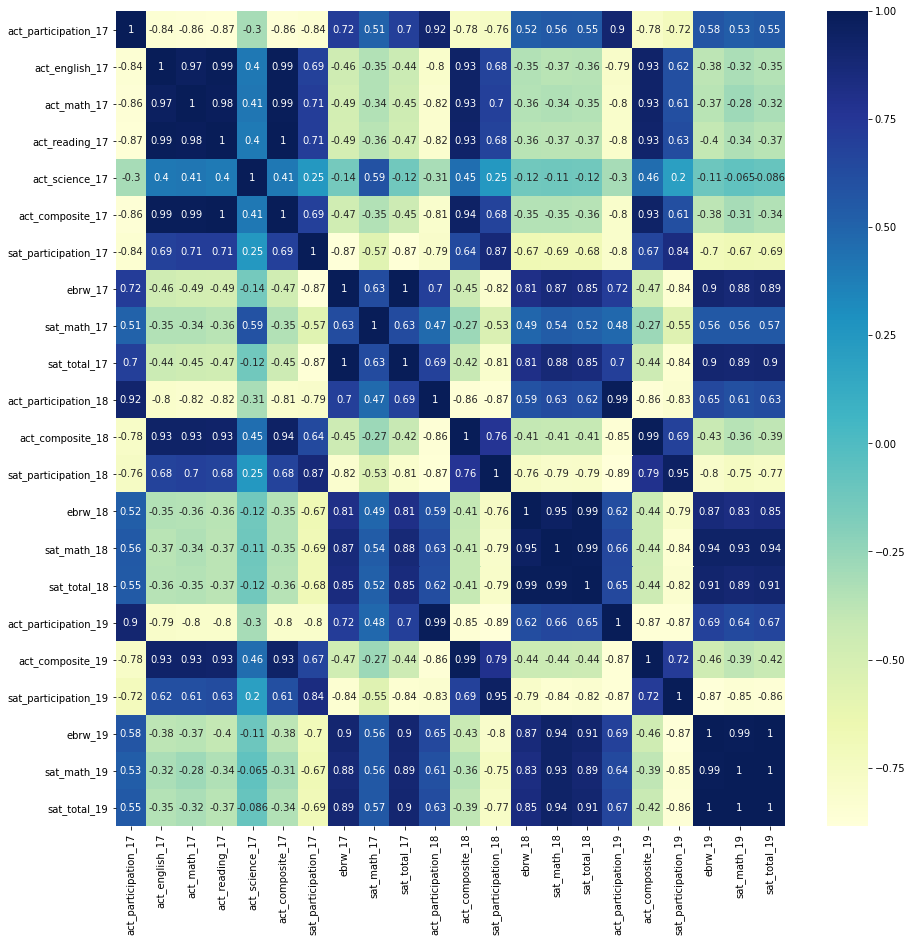

In [291]:
plt.figure(figsize=(15,15))
sns.heatmap(final_csv.corr(), cmap="YlGnBu", annot = True);

As pretty as they are, scatter plots aren't telling us much here. They show us that there's a relationship between some of our columns but thats about it
Let's try a few other methods below!

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [192]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

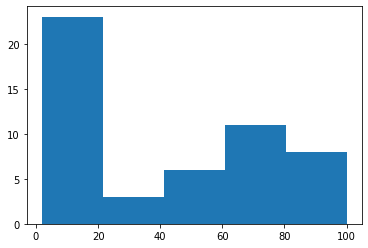

In [290]:
# Code
plt.hist(final_csv['sat_participation_17'], bins = 5);


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


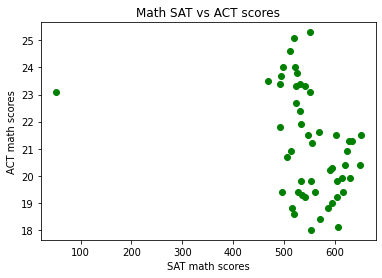

In [268]:
plt.scatter(x = final_csv['sat_math_17'], y = final_csv['act_math_17'], c ='green')
plt.title("Math SAT vs ACT scores")
plt.xlabel("SAT math scores")
plt.ylabel("ACT math scores")
plt.show();


### Interpret:
Looking at our plot, this tells us that students generally perform above the average for both tests.
With the exception of Maryland, who had a math score of 52 on the SAT and therefore is the outlier in this data set

So as far as apptitude goes, we can't tell which test is "better" as students seem to do just as well on either.

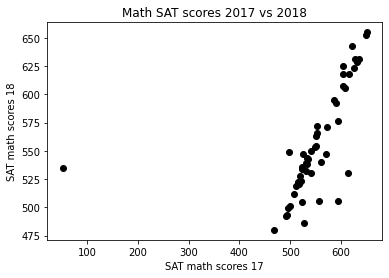

In [373]:
plt.scatter(x = final_csv['sat_math_17'], y = final_csv['sat_math_18'], c ='black')
plt.title("Math SAT scores 2017 vs 2018")
plt.xlabel("SAT math scores 17")
plt.ylabel("SAT math scores 18")
plt.show();

#### Interpret:
The comparision from 2017 to 2018 math scores seems more right skewed which is interesting.. Looks like students overall did better on the Math 2017 SAT's vs the 2018

In [369]:
final_csv.describe().T #shows a summation of our dataset

,count,mean,std,min,25%,50%,75%,max
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
ebrw_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,547.627451,84.909119,52.0,522.00,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


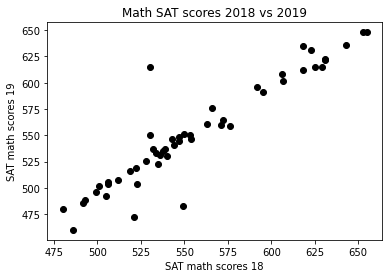

In [365]:
plt.scatter(x = final_csv['sat_math_18'], y = final_csv['sat_math_19'], c ='black')
plt.title("Math SAT scores 2018 vs 2019")
plt.xlabel("SAT math scores 18")
plt.ylabel("SAT math scores 19")
plt.show();

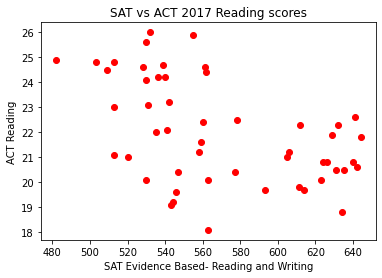

In [270]:
plt.scatter(x = final_csv['ebrw_17'], y = final_csv['act_reading_17'], c ='red')
plt.title("SAT vs ACT 2017 Reading scores")
plt.xlabel("SAT Evidence Based- Reading and Writing")
plt.ylabel("ACT Reading")
plt.show();


##  Score Interpretation:

There doesnt seem to be much of a correlation here. The SAT EBRW scores range from 480-640 and the ACT scores range from 18-26.

Again not much of a relationship if we're trying to decipher which test is "better"

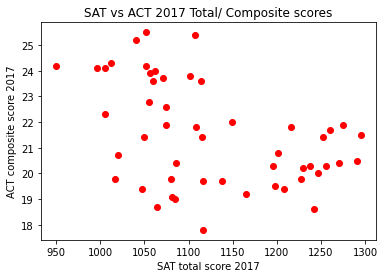

In [285]:
plt.scatter(x = final_csv['sat_total_17'], y = final_csv['act_composite_17'], c ='red')
plt.title("SAT vs ACT 2017 Total/ Composite scores")
plt.xlabel("SAT total score 2017")
plt.ylabel("ACT composite score 2017")
plt.show();


## Interpret:
Same as above, we have true "scattered" data here. This just shows a range of scores but not that there's a relationship of one test scoring higher than the other


## SAT 2017 -2019 Total scores 


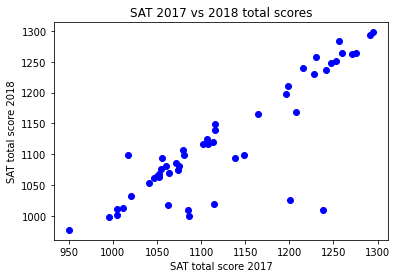

In [293]:
plt.scatter(x = final_csv['sat_total_17'], y = final_csv['sat_total_18'], c ='blue')
plt.title("SAT 2017 vs 2018 total scores") 
plt.xlabel("SAT total score 2017")
plt.ylabel("SAT total score 2018")
plt.show();

## Interpret:

With the exception of a few outliers, we seem to have a linear relationshp between our 2017 and 2018 total SAT scores. This means that scores have improved from 2017 to 2018. As one unit of the SAT 2017 score increases, we see an increase in the SAT 2018 scores.  

What about 2018 to 2019 for the SAT scores? Let's see below

An even closer Linear relationship! We do have some outliers here as well but even with that, there seems to be an increase in SAT 2019 scores as well

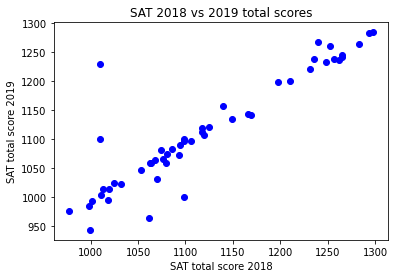

In [294]:
plt.scatter(x = final_csv['sat_total_18'], y = final_csv['sat_total_19'], c ='blue')
plt.title("SAT 2018 vs 2019 total scores") 
plt.xlabel("SAT total score 2018")
plt.ylabel("SAT total score 2019")
plt.show();

### ACT 2017 -2019 TOTAL SCORES

In [318]:
def scatter_plt(score1, score2, title = plt.title, x = plt.xlabel, y = plt.ylabel):
    plot = plt.scatter(x = score1, y = score2, c ='purple')
    plt.show()
    return plot;

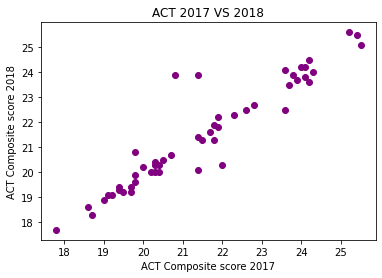

In [319]:
scatter_plt(final_csv['act_composite_17'], final_csv['act_composite_18'], 
            title = plt.title('ACT 2017 VS 2018'), x =  plt.xlabel("ACT Composite score 2017"),
            y =plt.ylabel("ACT Composite score 2018") );

## Interpret:

There's also an upward trend of the scores from 2017-2018 with a few outliers. Does this mean students are getting smarter? Or just becoming better equipped at test taking. I think it might be the latter. 
We have no real way of predicting if increased score equals smarter students

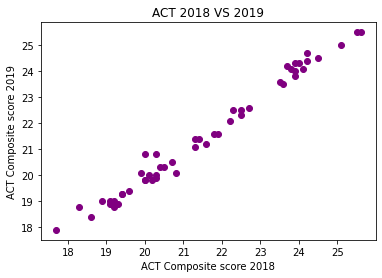

In [320]:
scatter_plt(final_csv['act_composite_18'], final_csv['act_composite_19'], 
            title = plt.title('ACT 2018 VS 2019'), x =  plt.xlabel("ACT Composite score 2018"),
            y = plt.ylabel("ACT Composite score 2019"));

This also exhibits an even closer linear relationship. This is very similar to our SAT data where the total scores have been increasing from year to year

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

<AxesSubplot:xlabel='act_composite_17'>

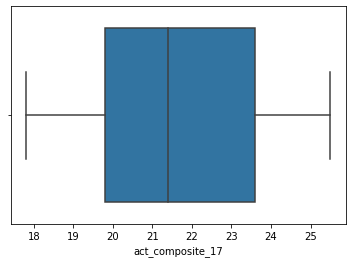

In [347]:
sns.boxplot(x = final_csv['act_composite_17'])

<AxesSubplot:xlabel='act_composite_18'>

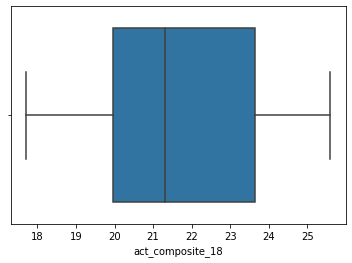

In [324]:


sns.boxplot(x = final_csv['act_composite_18']) #No outliers here

<AxesSubplot:xlabel='act_composite_19'>

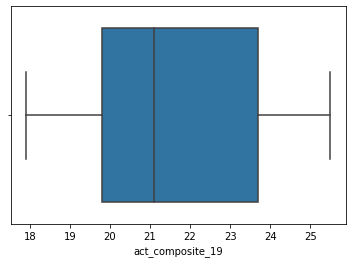

In [346]:
sns.boxplot(x = final_csv['act_composite_19']) #no outliers here either

In [331]:
states = final_csv.index #created a states DF incase I need to use it for plotting

In [340]:
states =pd.DataFrame(states)
states.head(2)

,state
0,Alabama
1,Alaska


<AxesSubplot:xlabel='act_composite_19', ylabel='sat_total_19'>

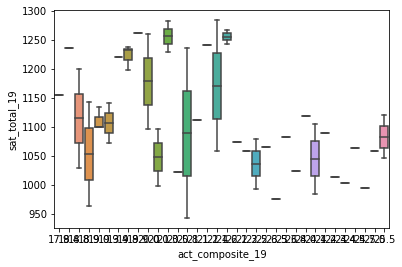

In [345]:
sns.boxplot(x = final_csv['act_composite_19'], y = final_csv['sat_total_19'])

<AxesSubplot:xlabel='sat_math_17'>

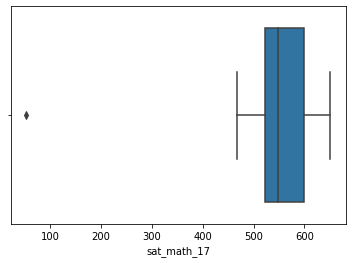

In [351]:
sns.boxplot(x = final_csv['sat_math_17']) #our outlier in ACT Math 2017 score, which comes from Maryland

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

<AxesSubplot:xlabel='act_participation_17'>

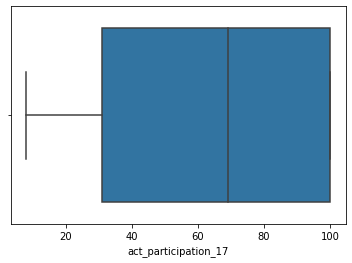

In [358]:
sns.boxplot(x = final_csv["act_participation_17"])

### Observation for box plots: 

According to our box plots, we only seem to have few outliers in our data set but the range of values also vary which is good. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

https://thenextweb.com/podium/2019/03/16/how-the-act-and-sat-exams-are-built-to-fail-students/

https://www.csmonitor.com/USA/USA-Update/2016/0120/Harvard-study-says-SATs-should-be-optional.-Here-s-why

https://www.oxfordlearning.com/what-is-test-anxiety/#:~:text=Test%20anxiety%20is%20more%20than,test%20anxiety%20at%20any%20age.

https://www.rasmussen.edu/degrees/education/blog/types-of-learning-styles/


Based on outside research and the data above, my theory that standardized test do very little in terms of perparing a student for college and even being an overall measure of apptitude stands true.

The research I've done also focuses on how an estimated 10 million children in North America suffer with Anxiety and also "16-20% of students have high test anxiety" based on a study that was conducted by the American Test Anxieties Association.

Even Harvard **HARVARD!!** believes that the tests should be optional. They believe the goal of an entrance college application should be less about test score and more about extracurricular activites and interests that a student has. That is what adds diversity to a student body.


When we only evaluate students based on test scores, we narrow in only on a subset of students that can afford test prep, or come from highschools in "wealthier districts" that may have resources that focus on helping their students pass these tests. Whereas someone coming from a less fortunate background may not have these options but can benefit greatly from what that particular college might be able to offer.


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

***Our data:
While our data has shown us that participation rates have varied from year to year, the states that scored highest and lowest on any given test, it has done very little to prove that "acing" any of these tests is a measure of succeeding in college *** 

**I did notice something peculiar with these tests however. With the exception of Georgia, Florida and Hawaii, if a state participated in taking the ACT's then it usually had very low participation on the SAT's and vice versa.** 

**Recommendations:**

- I believe that all colleges should adopt an optional model. That is, make either standardized tests optional for students and moreover, put more focus on their backgrounds and what makes them unique.  

- A test score is not an accurate measure of a students intelligence or success. They're have been numerous studies that prove this( one is linked above) . People learn in different ways, therefore we cannot use a standardized score as a gauge for all students.

- If we focus more on a qualitative rather than a quantitative scale, I beleive we can increase diversity levels across each student population in a given college 

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 